<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [1]:
# type your code here
df=pd.read_csv(r'malaria.csv')
df.head()

<IPython.core.display.Javascript object>

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
df.isna().sum()

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

* yes there are records where no data has been reported

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# type your code here
m=df.isna().sum()/len(df)*100
u_c=m[m>60].index
u_c

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [4]:
m.sort_values(ascending =False)[m>60]

Deaths_Mali       90.551181
Cases_Mali        90.551181
Deaths_Spain      87.401575
Cases_Spain       87.401575
Deaths_Senegal    82.677165
Cases_Senegal     80.314961
Deaths_Nigeria    70.078740
Cases_Nigeria     70.078740
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.head(10)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
6,2706.0,8018.0,9446.0,NaN,NaN,17.0,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,12.0,NaN,NaN
7,2695.0,NaN,9409.0,NaN,NaN,11.0,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,2.0,NaN,NaN
8,2630.0,7977.0,9203.0,NaN,NaN,10.0,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,6.0,NaN,NaN
9,2597.0,NaN,9004.0,NaN,NaN,1.0,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria',
       'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [8]:
# type your code here
df1=df[['Cases_Guinea','Deaths_Guinea']]
print('Guinea',df1.isna().sum())

df2=df[['Cases_Liberia','Deaths_Liberia']]
print('Liberia',df2.isna().sum())

df3=df[['Cases_SierraLeone','Deaths_SierraLeone']]
print('SierraLeone',df3.isna().sum())


df4=df[['Cases_Nigeria','Deaths_Nigeria']]
print('Nigeria',df4.isna().sum())

Guinea Cases_Guinea     34
Deaths_Guinea    35
dtype: int64
Liberia Cases_Liberia     44
Deaths_Liberia    46
dtype: int64
SierraLeone Cases_SierraLeone     40
Deaths_SierraLeone    40
dtype: int64
Nigeria Cases_Nigeria     89
Deaths_Nigeria    89
dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

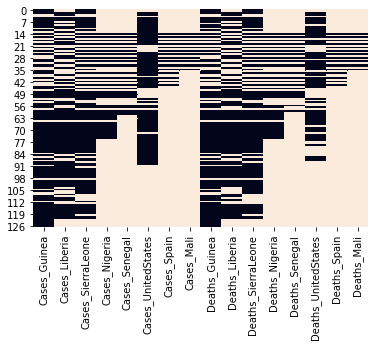

In [6]:
# type your code here
sns.heatmap(df.isna(),cbar=False)
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
m=df.isna().sum(axis=1)
null_ind=m[len(df.columns)-m<=2].index.values
df.drop(null_ind).shape

(110, 16)

In [11]:
df[m<=2].shape

(9, 16)

In [8]:
df.isna().sum(axis=1)

0      12
1      12
2       8
3      12
4      16
       ..
122    10
123    14
124    14
125    14
126    14
Length: 127, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
df.drop(u_c,axis=1,inplace=True)
df.shape

(127, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_UnitedStates', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_UnitedStates'],
      dtype='object')

* Before filling null values in Liberia cases lets analyse its distribution

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

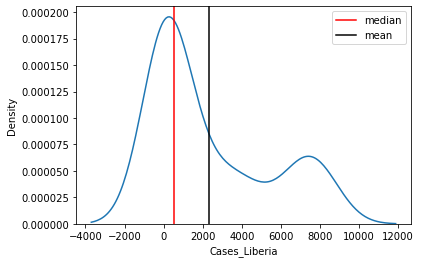

In [11]:
# type your code here
sns.distplot(df['Cases_Liberia'],kde=True,hist=False)
plt.axvline(df['Cases_Liberia'].median(),color='r',label='median')
# plt.xlim(0,15000)
plt.axvline(df['Cases_Liberia'].mean(),color='k',label='mean')
plt.legend()
plt.show()

* Libaria cases is skewd one and most of records from 0 to 2000 so its better to fill missing values by median

In [24]:
print(df['Cases_Liberia'].isna().sum())
df['Cases_Liberia']=df['Cases_Liberia'].fillna(df['Cases_Liberia'].median())
print(df['Cases_Liberia'].isna().sum())

44
0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_UnitedStates', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_UnitedStates'],
      dtype='object')

* Before treating the missing value lets analyse its distribution

The datatype is float64


C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


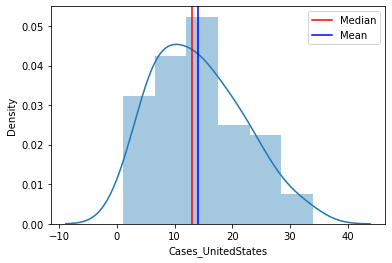

In [30]:
# type your code here
print('The datatype is',df['Cases_UnitedStates'].dtype)
sns.distplot(df['Cases_UnitedStates'])
plt.axvline(df['Cases_UnitedStates'].median(),color='r',label='Median')
plt.axvline(df['Cases_UnitedStates'].mean(),color='b',label='Mean')
plt.legend()
plt.show()

* lets check the relationship between cases and desahs

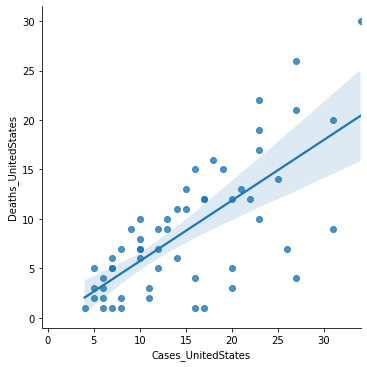

In [32]:
sns.lmplot(x='Cases_UnitedStates',y='Deaths_UnitedStates',data=df)
plt.show()

In [33]:
df[['Cases_UnitedStates','Deaths_UnitedStates']].corr()

,Cases_UnitedStates,Deaths_UnitedStates
Cases_UnitedStates,1.000000,0.713298
Deaths_UnitedStates,0.713298,1.000000


* For this case its good to aply some model in order to predict the missing values in cases column from death column in america

In [34]:
print('Before filling missing values',df['Cases_UnitedStates'].isna().sum())
df['Cases_UnitedStates']=df['Cases_UnitedStates'].fillna(df['Cases_UnitedStates'].mean())
print('After filling missing values',df['Cases_UnitedStates'].isna().sum())

Before filling missing values 54
After filling missing values 0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Lets observe the distribution of observations from 'Guinea' column

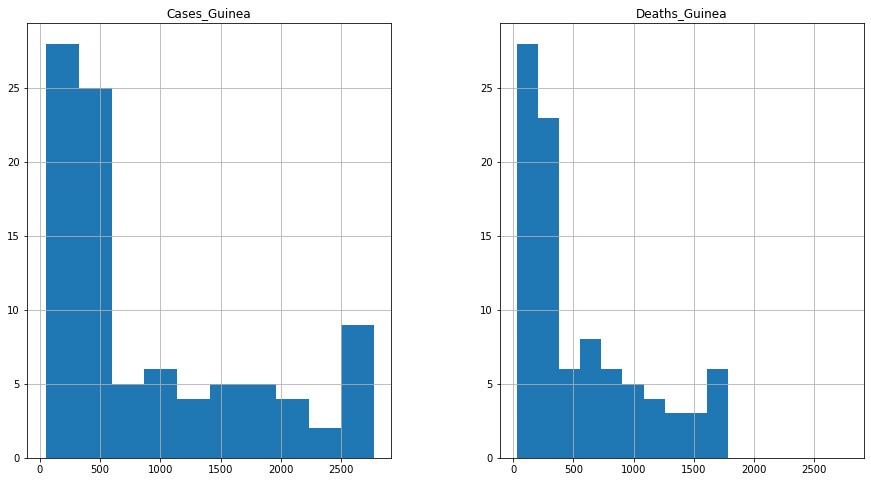

In [39]:
# type your code here

# type your code here
df1 = df[['Cases_Guinea', 'Deaths_Guinea']]

## ploting
df1.hist(figsize = (15,8),sharex=True)
plt.show()


* From the above plot we can see that data is highly right skewed  so its better to replace the missing values with median

In [40]:
print('Before filling missing values',df['Cases_Guinea'].isna().sum())
df['Cases_Guinea']=df['Cases_Guinea'].fillna(df['Cases_Guinea'].median())
print('After filling missing values',df['Cases_Guinea'].isna().sum())
print('Before filling missing values',df['Deaths_Guinea'].isna().sum())
df['Deaths_Guinea']=df[ 'Deaths_Guinea'].fillna(df[ 'Deaths_Guinea'].median())
print('After filling missing values',df['Deaths_Guinea'].isna().sum())

Before filling missing values 34
After filling missing values 0
Before filling missing values 35
After filling missing values 0


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df1=pd.read_csv('house.csv')

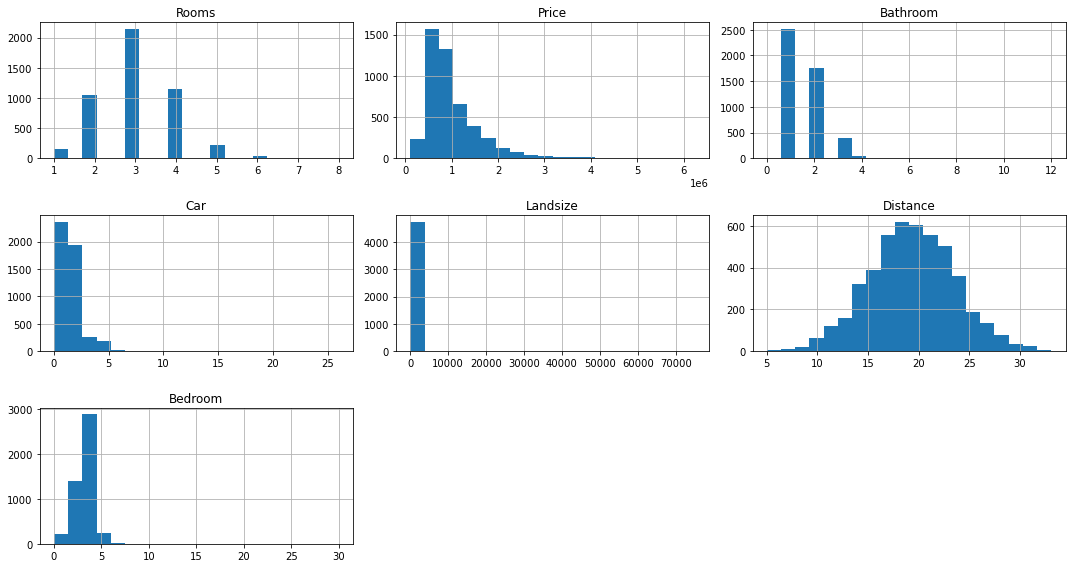

In [65]:
# type your code here

df1.hist(bins = 20,figsize = (15,8))
plt.tight_layout()
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
df1.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

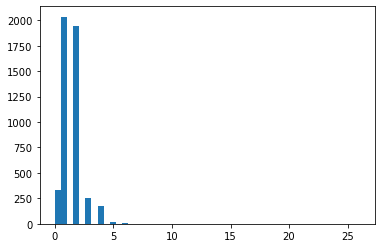

In [76]:
# type your code here
plt.hist(df1['Car'],bins=50)
plt.show()

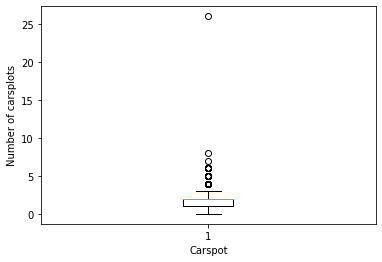

In [91]:
plt.figure(figsize=(6,4))
plt.boxplot(df1['Car'])
plt.ylabel('Number of carsplots')
plt.xlabel('Carspot')
plt.show()

* yes there is one outlier present in number of carspot which is more than 25

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
df1.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

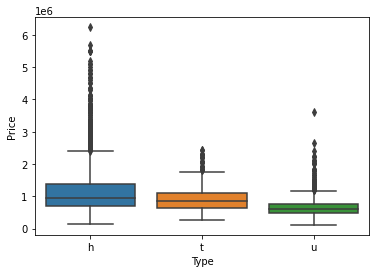

In [97]:
# type your code here
sns.boxplot(data=df1,y='Price',x='Type')
plt.show()

* There are more outliers in h type as compared to t and u type

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

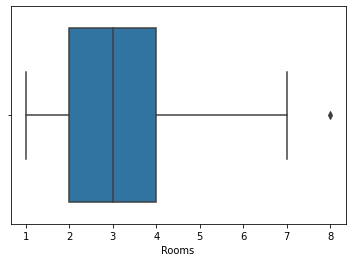

In [98]:
# type your code here
sns.boxplot(data=df1,x='Rooms')
plt.show()

* There is one room which contain 8 number of rooms which ic completely different from other houses

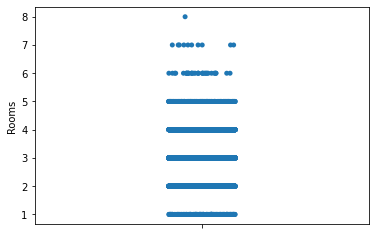

In [100]:
sns.stripplot(data=df1,y='Rooms')
plt.show()

In [105]:
# * To find the outlier value using zscore
from scipy.stats import zscore

room=zscore(df1['Rooms'])
df1['Rooms'][(room<-3) | (room >3)].unique()

array([7, 6, 8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#type your code here

* We can go for 6 sigma rule 
* We can go for outlier finding using boxplot, or histogram  or  

In [106]:
df1.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


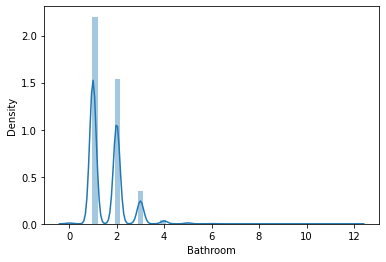

In [109]:
sns.distplot(df1['Bathroom'])
plt.show()

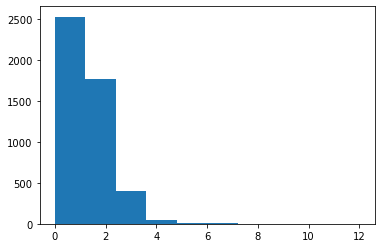

In [112]:
plt.hist(df1['Bathroom'])
plt.show()

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


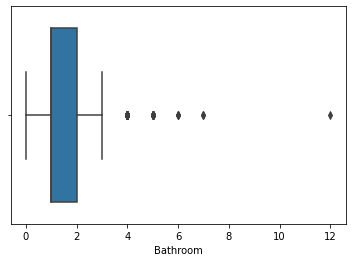

In [118]:
sns.boxplot(df1['Bathroom'])
plt.show()

In [130]:
# ----------------from 6 sigma rule---------------
bathroom=zscore(df1['Bathroom'])
df1['Bathroom'][(bathroom<-3) | (bathroom >3)].unique()

array([ 7,  4,  5,  6, 12], dtype=int64)

* From box plot, in order to preserve the data we can say only 12 is the outlier

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
df1.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [140]:
# type your code here
# According 6 sigma rule those are outliers whose values are zscores are less than -3 or greater than 3
print('The outliers corresponding to bedroom are ',df1['Bedroom'][(bedroom<-6) | (bedroom>6)].unique())
bedroom=zscore(df1['Bedroom'])
df1[(bedroom<-6) | (bedroom>6)]

The outliers corresponding to bedroom are  [30]


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30


<ipython-input-151-30748f149c78>:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s ='Extreme Point', xy=(0, 29.9), xytext=(1.2, 29.72), arrowprops=dict(facecolor='blue', arrowstyle = 'simple'))


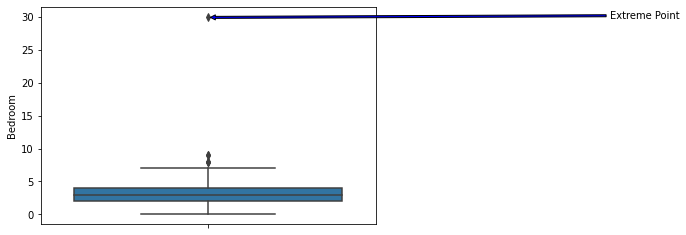

In [151]:
sns.boxplot(data=df1,y='Bedroom')
plt.annotate(s ='Extreme Point', xy=(0, 29.9), xytext=(1.2, 29.72), arrowprops=dict(facecolor='blue', arrowstyle = 'simple'))

plt.show()

 so number of bedroom =30 is the extreme outlies

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [142]:
df1.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [161]:
# type your code here
print('Mean value of distance before handling outliers',df1['Distance'].mean())
dist_q1=df1['Distance'].quantile(0.25)
dist_q2=df1['Distance'].quantile(0.5)
dist_q3=df1['Distance'].quantile(0.75)
dist_IQR=dist_q3-dist_q1
dist=df1['Distance']
print('After dealing with outliers the mean is ',dist[(dist<(dist_q1-(1.5*dist_IQR))) |(dist>(dist_q3+(1.5*dist_IQR)))].mean())

Mean value of distance before handling outliers 19.32834662190515
After dealing with outliers the mean is  21.912903225806456


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


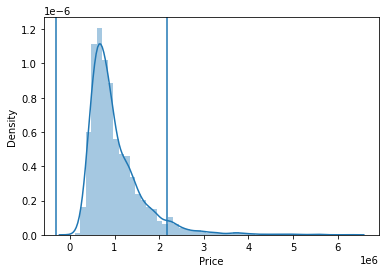

In [163]:
# type your code here
Q1=df1['Price'].quantile(0.25)
Q2=df1['Price'].quantile(0.5)
Q3=df1['Price'].quantile(0.75)
IQR=Q3-Q1
sns.distplot(df1['Price'])
plt.axvline(Q3+1.5*IQR)
plt.axvline(Q1-1.5*IQR)

plt.show()

* form above plot we can say that since price is hoghly right skewed data so its better to take k more than 1.5

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


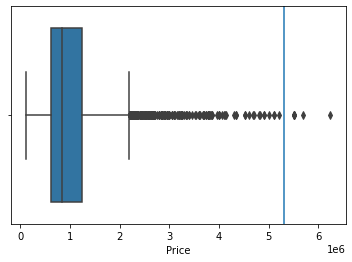

In [174]:
Q1=df1['Price'].quantile(0.25)
Q2=df1['Price'].quantile(0.5)
Q3=df1['Price'].quantile(0.75)
IQR=Q3-Q1
sns.boxplot(df1['Price'])
plt.axvline(Q3+6.5*IQR)

* By triel and error method we acn say that k=6.5

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

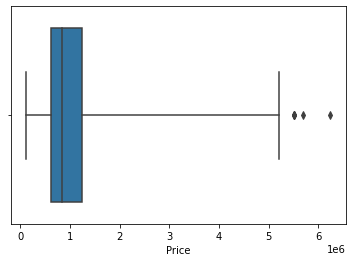

In [175]:
sns.boxplot(df1['Price'],whis=6.5)

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [177]:
# type your code here
df1['Distance'].describe()


count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [179]:
labels=['Walkable','Go_by_Bicycle','Far']
ranges=[0,6,12,df1['Distance'].max()]
df1['Distance_label']=pd.cut(df1['Distance'],bins=ranges,labels=labels)
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance_label
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,Far
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,Far
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,Far
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,Far
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,Far


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

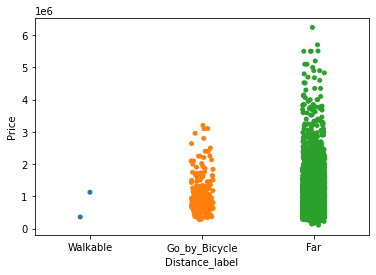

In [182]:
# type your code here
sns.stripplot(data=df1,y='Price',x='Distance_label')
plt.show()

* From above plot we can say that the house with far distance fetch more price

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [184]:
# type your code here
x=df1.drop('Price',axis=1)
y=df1['Price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [185]:
y_train,y_test= train_test_split(y,test_size=0.2)

In [187]:
round(len(y_train)/len(df1)*100)

80

In [188]:
round(len(y_test)/len(df1)*100)

20